# #7 beta_regression analysis

In this Jupyter Notebook, we compute the beta of stocks("MSFT" relative to "S&P500"):

1. compare & plot the beta computed daily vs. monthly
2. 

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

# msft vs. market rerurns - daily
msft = yf.download('MSFT', start='2010-01-01', end='2020-01-31')['Adj Close']
sp500 = yf.download('^GSPC', start='2010-01-01', end='2020-01-31')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
msft

Date
2010-01-04     23.572365
2010-01-05     23.579988
2010-01-06     23.435274
2010-01-07     23.191555
2010-01-08     23.351496
                 ...    
2020-01-24    159.698990
2020-01-27    157.028336
2020-01-28    160.105408
2020-01-29    162.601898
2020-01-30    167.188522
Name: Adj Close, Length: 2536, dtype: float64

In [3]:
sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2020-01-24,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971,3708780000
2020-01-27,3247.159912,3258.850098,3234.500000,3243.629883,3243.629883,3831050000
2020-01-28,3255.350098,3285.780029,3253.219971,3276.239990,3276.239990,3531570000


In [4]:
sp500 = sp500['Adj Close']

In [5]:
df = pd.concat([msft, sp500], axis=1)
df

,Adj Close,Adj Close
Date,,
2010-01-04,23.572365,1132.989990
2010-01-05,23.579988,1136.520020
2010-01-06,23.435274,1137.140015
2010-01-07,23.191555,1141.689941
2010-01-08,23.351496,1144.979980
...,...,...
2020-01-24,159.698990,3295.469971
2020-01-27,157.028336,3243.629883
2020-01-28,160.105408,3276.239990


In [6]:
df.columns = ['MSFT', 'SP500']
df.dropna()
df

,MSFT,SP500
Date,,
2010-01-04,23.572365,1132.989990
2010-01-05,23.579988,1136.520020
2010-01-06,23.435274,1137.140015
2010-01-07,23.191555,1141.689941
2010-01-08,23.351496,1144.979980
...,...,...
2020-01-24,159.698990,3295.469971
2020-01-27,157.028336,3243.629883
2020-01-28,160.105408,3276.239990


In [7]:
ret = df.pct_change() * 100
ret.head()

,MSFT,SP500
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.032342,0.311568
2010-01-06,-0.613717,0.054552
2010-01-07,-1.039967,0.400120
2010-01-08,0.689651,0.288173


In [8]:
ret = ret.dropna()
ret.head()

,MSFT,SP500
Date,,
2010-01-05,0.032342,0.311568
2010-01-06,-0.613717,0.054552
2010-01-07,-1.039967,0.400120
2010-01-08,0.689651,0.288173
2010-01-11,-1.271993,0.174676


In [21]:
# mean (daily) return of the market
r_m = ret['SP500'].mean()
print(r_m)

0.0463009081140945


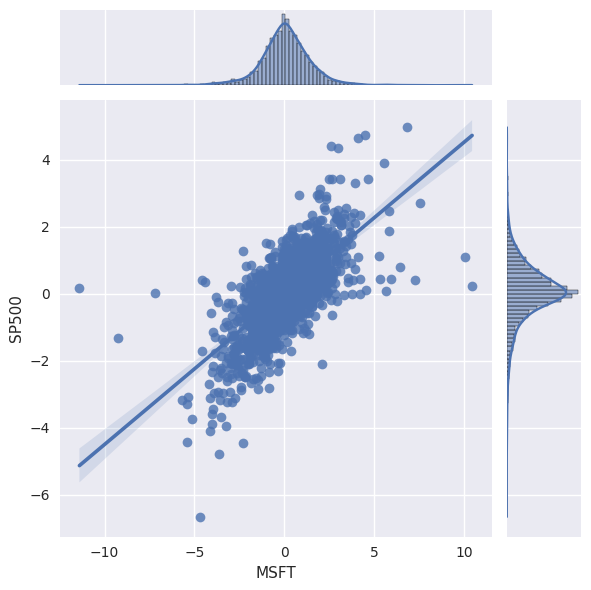

In [13]:
# visualizing the correlation btwn MSFT vs. SP500
import seaborn as sns
import matplotlib.pyplot as plt

with plt.style.context('seaborn'):
    sns.jointplot(x='MSFT', y='SP500', data=ret, kind='reg')
    # plt.xlabel('MSFT')
    # plt.ylabel('S&P500')
    # plt.title('Joint plot MSFT VS. SP500')
    # plt.show()

well, there seems to be some `weak` linear relationship between the two returns.

Via linear regression, we see this relationship clearly:

In [30]:
from statsmodels.formula.api import ols
model = ols("MSFT ~ SP500", data=ret).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     2364.
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:36:27   Log-Likelihood:                -3668.0
No. Observations:                2535   AIC:                             7340.
Df Residuals:                    2533   BIC:                             7352.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0380      0.020      1.855      0.064      -0.002       0.078
SP500          1.0707      0.022     48.624      0.000       1.027       1.114
==============================================================================
Omnibus:                      605.310   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30578.035
Skew:                           0.186   Prob(JB):                         0.00
Kurtosis:                      20.011   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the summary, CAPM suggests:
\begin{align*}
    r_{MSFT} &= \alpha + \beta * (r_{market} - r_f) \\
             &= 0.0380 + 1.0707 * (0.0463 - r_f)
\end{align*}

Here $r_{market} = r_{SP500}$.

p-value for beta(SP500) is almost 0 ($< 0.05$), hence is `statistically significant`.(통계적 유의성)<br>
But the p-value for $\alpha$ is 0.064, which implies this alpha value is not statistically significant.

Meanwhile R-squared(`결정계수`) value is about 0.483: so about 48.3% of the change in $r_{MSFT}$ is explained by the change of $r_{market}$.

recall the dataset covers: from '2010-01-01' to '2020-01-31'

이제 daily returns을 기준으로 alpha 와 beta 값이 이 기간동안 어떻게 변했는지 그려본다:

Text(0.5, 0.98, 'Daily alpha & beta for MSFT vs. S&P500')

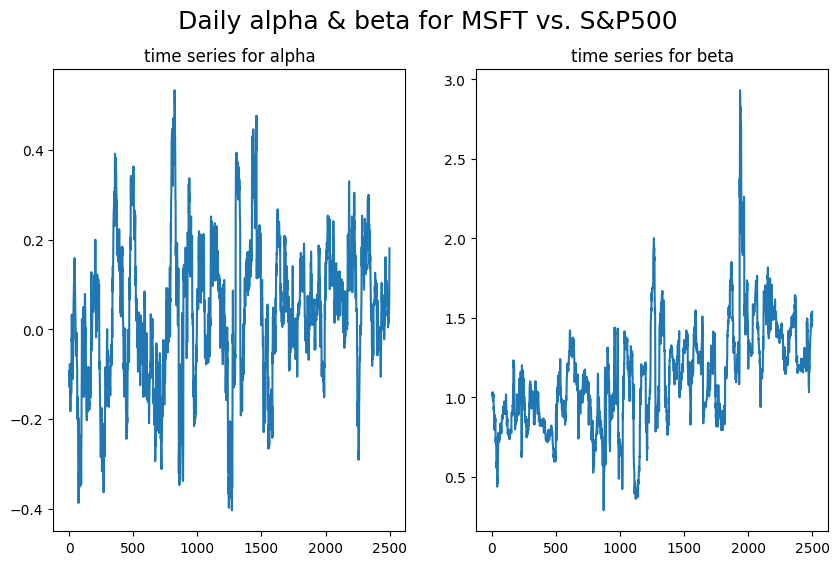

In [24]:
coef_a, coef_b = [], []
j = 36
while j <= len(ret):
    data_36 = ret.iloc[j-36:j, :]
    coefs = ols('MSFT ~ SP500', data=data_36).fit().params
    coef_a.append(coefs[0])
    coef_b.append(coefs[1])
    j += 1

fix, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(coef_a)
ax[0].set_title('time series for alpha')
ax[1].plot(coef_b)
ax[1].set_title('time series for beta')
plt.suptitle("Daily alpha & beta for MSFT vs. S&P500", fontsize=18)

Text(0.5, 0.98, 'Daily alpha & beta for MSFT vs. S&P500')

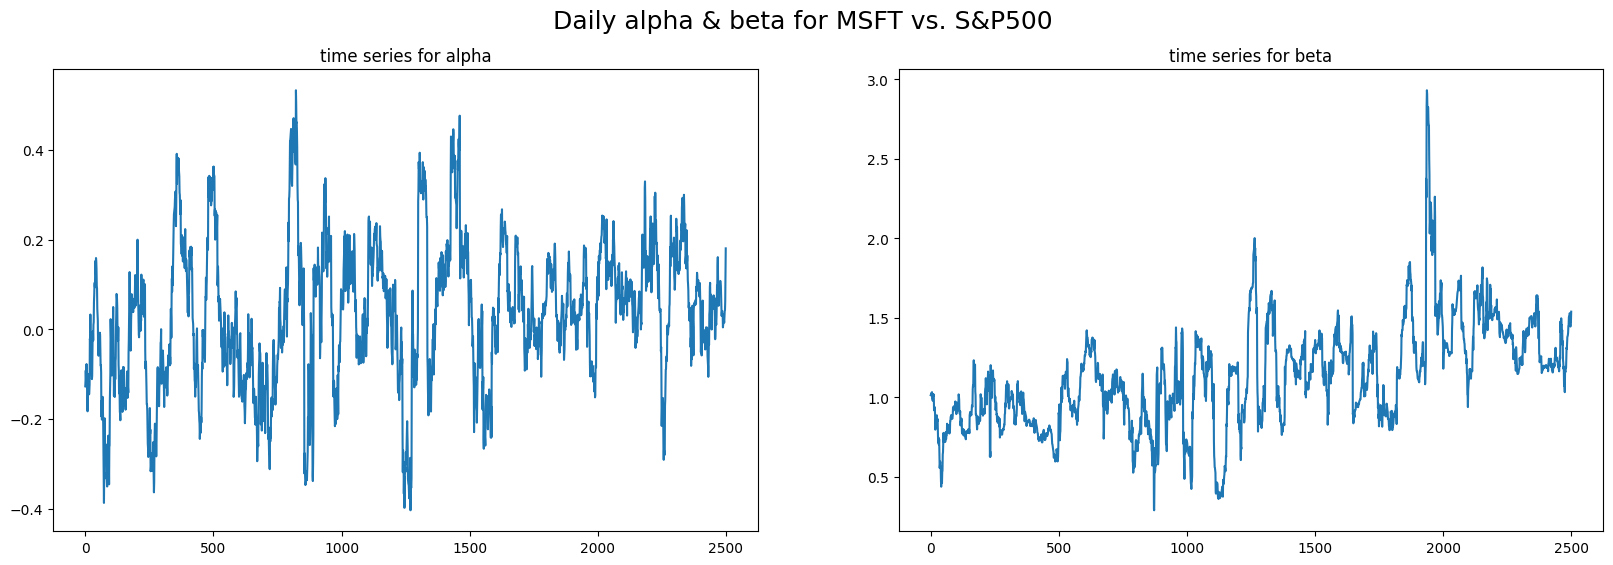

In [26]:
fix, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].plot(coef_a)
ax[0].set_title('time series for alpha')
ax[1].plot(coef_b)
ax[1].set_title('time series for beta')
plt.suptitle("Daily alpha & beta for MSFT vs. S&P500", fontsize=18)

Text(0.5, 0.98, 'Daily alpha & beta for MSFT vs. S&P500')

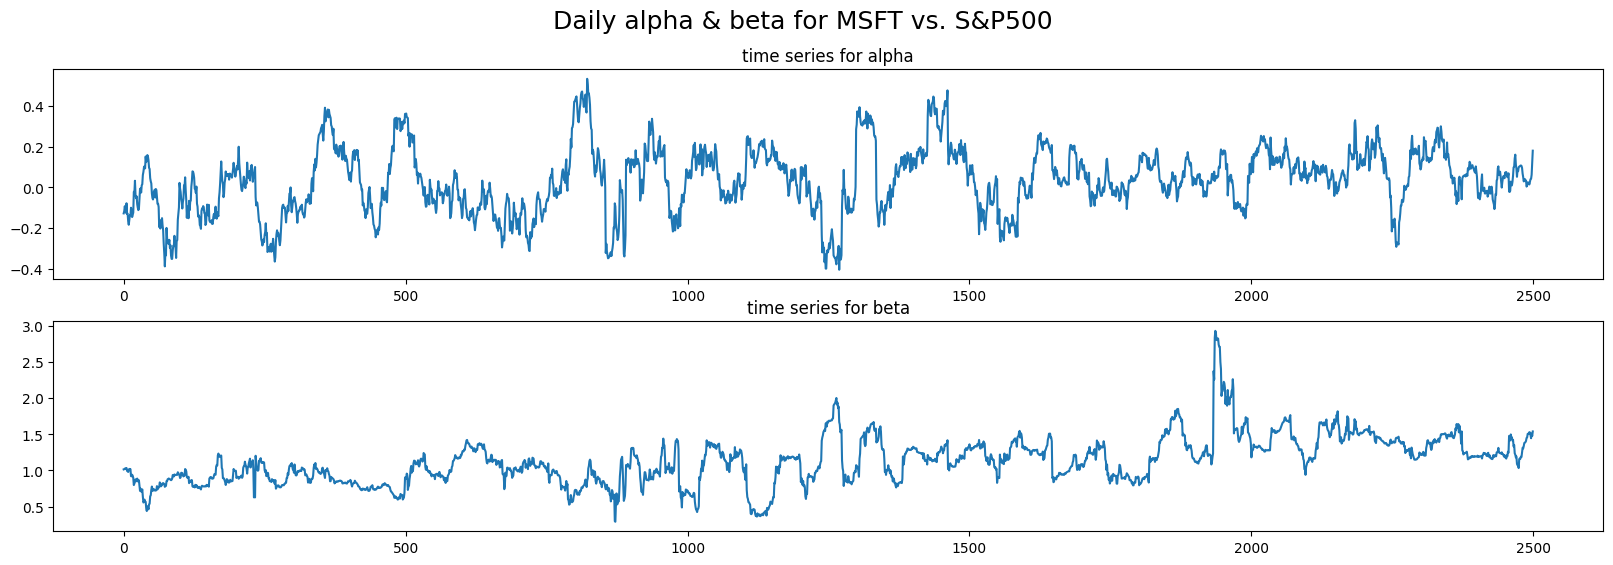

In [29]:
fix, ax = plt.subplots(2, 1, figsize=(20, 6))
ax[0].plot(coef_a)
ax[0].set_title('time series for alpha')
ax[1].plot(coef_b)
ax[1].set_title('time series for beta')
plt.suptitle("Daily alpha & beta for MSFT vs. S&P500", fontsize=18)

daily returns 데이터는 변동폭이 너무 크기에

일간 데이터보다는 월간 데이터로부터 회귀분석하여 도출된 alpha와 beta를 더 신뢰할 수 있다.

물론 daily가 monthly보다는 약 30배 데이터가 더 많기는 하지만 절대적인 데이터의 수가 충분히 크기 때문에 통계학적으로 문제는 없다.

In [32]:
# monthly returns
msft_m = yf.download('MSFT', start='2010-01-01', end='2020-01-31', interval='1mo')['Adj Close']
sp500_m = yf.download('^GSPC', start='2010-01-01', end='2020-01-31', interval='1mo')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [33]:
df_m = pd.concat([msft_m, sp500_m], axis=1)
df_m.head()

,Adj Close,Adj Close
Date,,
2010-01-01,21.462656,1073.869995
2010-02-01,21.835855,1104.489990
2010-03-01,22.412382,1169.430054
2010-04-01,23.368864,1186.689941
2010-05-01,19.741875,1089.410034


In [34]:
df_m.columns = ['MSFT', 'SP500']
df_m.dropna()
df_m

,MSFT,SP500
Date,,
2010-01-01,21.462656,1073.869995
2010-02-01,21.835855,1104.489990
2010-03-01,22.412382,1169.430054
2010-04-01,23.368864,1186.689941
2010-05-01,19.741875,1089.410034
...,...,...
2019-09-01,134.074509,2976.739990
2019-10-01,138.259857,3037.560059
2019-11-01,145.984329,3140.979980


In [35]:
ret_m = df_m.pct_change() * 100
ret_m.head()

,MSFT,SP500
Date,,
2010-01-01,NaN,NaN
2010-02-01,1.738832,2.851369
2010-03-01,2.640275,5.879643
2010-04-01,4.267650,1.475923
2010-05-01,-15.520606,-8.197584


In [36]:
ret_m = ret_m.dropna()
ret_m.head()

,MSFT,SP500
Date,,
2010-02-01,1.738832,2.851369
2010-03-01,2.640275,5.879643
2010-04-01,4.267650,1.475923
2010-05-01,-15.520606,-8.197584
2010-06-01,-10.411531,-5.388244


In [37]:
# mean (monthly) return of the market
rm_m = ret_m['SP500'].mean()
print(rm_m)

0.9840626707151651


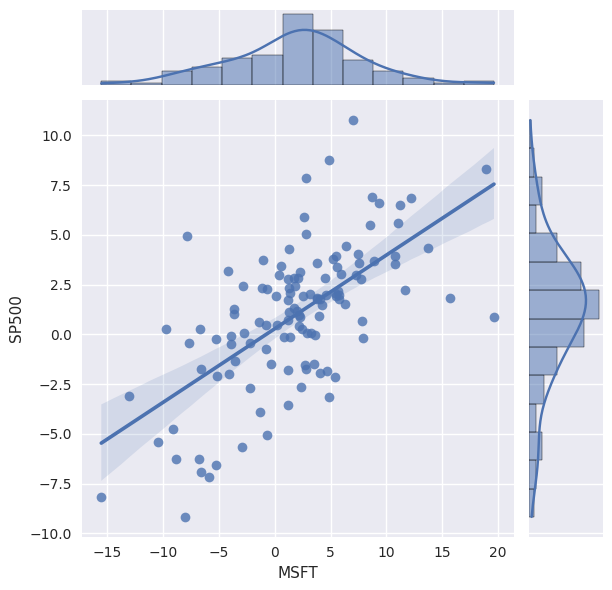

In [38]:
with plt.style.context('seaborn'):
    sns.jointplot(x='MSFT', y='SP500', data=ret_m, kind='reg')   

In [39]:
from statsmodels.formula.api import ols
model = ols("MSFT ~ SP500", data=ret_m).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     77.87
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.19e-14
Time:                        11:42:19   Log-Likelihood:                -355.96
No. Observations:                 120   AIC:                             715.9
Df Residuals:                     118   BIC:                             721.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8377      0.449      1.866      0.064      -0.051       1.727
SP500          1.0731      0.122      8.824      0.000       0.832       1.314
==============================================================================
Omnibus:                        7.311   Durbin-Watson:                   2.281
Prob(Omnibus):                  0.026   Jarque-Bera (JB):               11.406
Skew:                           0.219   Prob(JB):                      0.00334
Kurtosis:                       4.446   Cond. No.                         3.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
0.8377 / 0.0380

22.044736842105262

In [53]:
5.4772 * 0.0380, 5.4772 * 1.0707

(0.2081336, 5.86443804)

즉, MSFT와 ^GSPC의 월간 수익률로부터 선형회귀를 진행하면 $\alpha_m = 0.8377, \beta_m=1.0731$로 나타났고

이를 식으로 나타내면

\begin{align*}
    r_{MSFT,m} &= \alpha_m + \beta_m * (r_{market,m} - r_{f,m}) \\
             &= 0.8377 + 1.0731 * (0.9841 - r_f)
\end{align*}
이 됨을 알 수 있다.

참고로 위 daily returns에서 구한 $\alpha=0.0380, \beta=1.0707$ 값과 비교해보면
$\beta$ 값은 큰 차이가 없으나 $\alpha$ 값은 대략 22.0447배나 차이가 남을 알 수 있다.

참고로 위 daily returns에서 구한 $\alpha=0.0380, \beta=1.0707$ 값에 $\sqrt{30} \approx 5.4772$를 곱해주면:
$$
    \alpha * 0.0380 \approx 0.2081, \beta * 1.0707 \approx 5.8644
$$ 이다. <- 어떻게 해석해야할까?


p-value for beta(SP500) is almost 0 ($< 0.05$), hence is `statistically significant`.(통계적 유의성)<br>
But the p-value for $\alpha$ is 0.064, which implies this alpha value is not statistically significant.

Meanwhile R-squared(`결정계수`) value is about 0.398: so about 39.8% of the change in $r_{MSFT, m}$ is explained by the change of $r_{market, m}$.
여기서 subscript m은 `monthly`를 나타낸다.

recall the dataset covers: from '2010-01-01' to '2020-01-31'

이제 `monthly` returns을 기준으로 alpha 와 beta 값이 이 기간동안 어떻게 변했는지 그려본다:

Text(0.5, 0.98, 'Monthly alpha & beta for MSFT vs. S&P500')

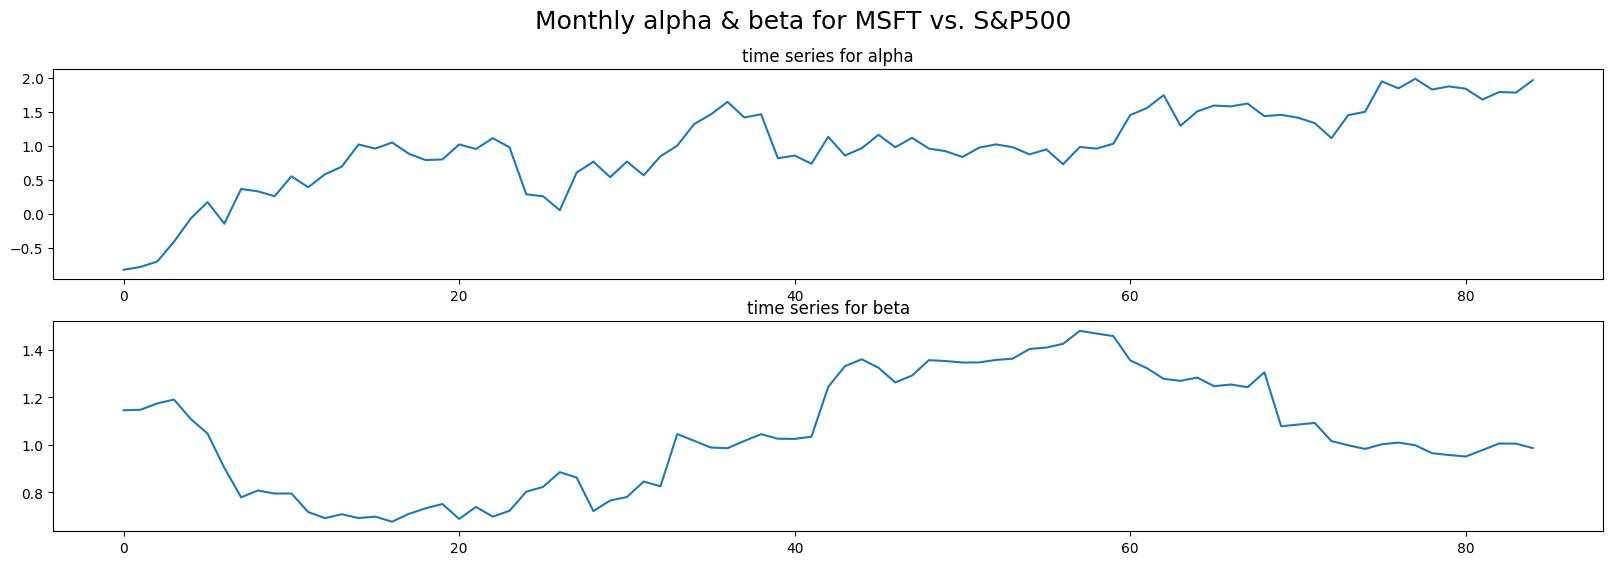

In [41]:
# monthly alpha & beta
coef_m_a, coef_m_b = [], []
j = 36
while j <= len(ret_m):
    data_36m = ret_m.iloc[j-36:j, :]
    coefs_m = ols('MSFT ~ SP500', data=data_36m).fit().params
    coef_m_a.append(coefs_m[0])
    coef_m_b.append(coefs_m[1])
    j += 1

fix, ax = plt.subplots(2, 1, figsize=(20, 6))
ax[0].plot(coef_m_a)
ax[0].set_title('time series for alpha')
ax[1].plot(coef_m_b)
ax[1].set_title('time series for beta')
plt.suptitle("Monthly alpha & beta for MSFT vs. S&P500", fontsize=18)

Text(0.5, 0.98, 'Daily & Monthly beta for MSFT vs. S&P500')

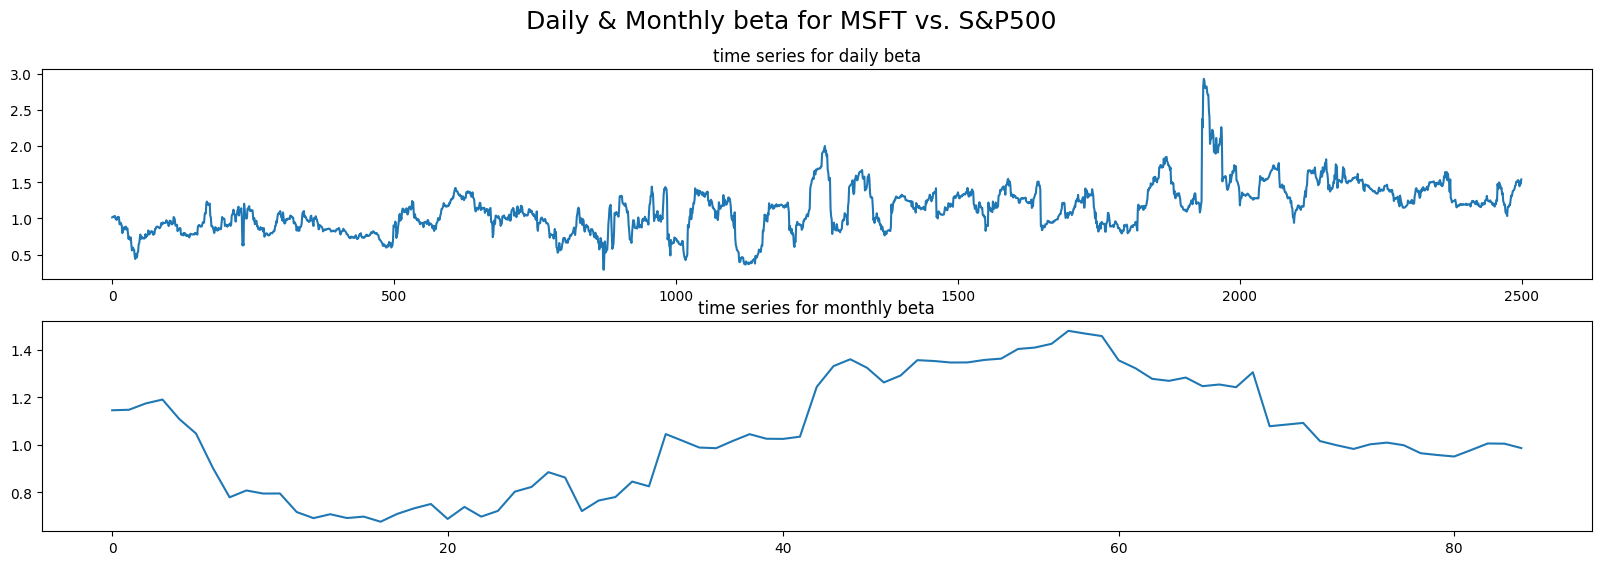

In [43]:
fix, ax = plt.subplots(2, 1, figsize=(20, 6))
ax[0].plot(coef_b)
ax[0].set_title('time series for daily beta')
ax[1].plot(coef_m_b)
ax[1].set_title('time series for monthly beta')
plt.suptitle("Daily & Monthly beta for MSFT vs. S&P500", fontsize=18)

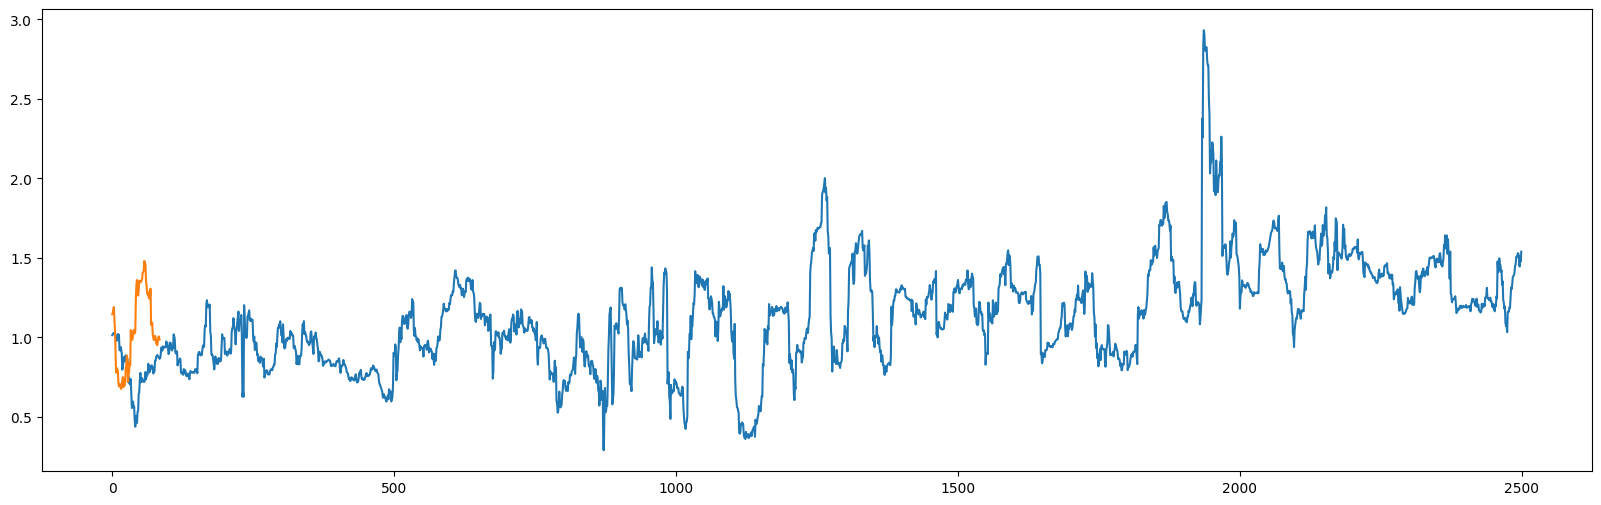

In [45]:
plt.figure(figsize=(20, 6))
plt.plot(coef_b)
plt.plot(coef_m_b)

In [51]:
len(coef_b), len(coef_m_b)

(2500, 85)

In [ ]:
fix, ax = plt.subplots(2, 1, figsize=(20, 6))
ax[0].plot(coef_b)
ax[0].set_title('time series for daily beta')
ax[1].plot(coef_m_b)
ax[1].set_title('time series for monthly beta')
plt.suptitle("Daily & Monthly beta for MSFT vs. S&P500", fontsize=18)

In [42]:
import statsmodels.api as smf

model = smf.formula.ols(formula="MSFT ~ SP500", data=ret).fit()

print(model.params)

Intercept    0.037954
SP500        1.070676
dtype: float64


In [ ]:
import statsmodels.api as sm
model = sm.OLS(ret['MSFT'], sm.add_constant(ret['SP500'])).fit()

model.summary()

In [ ]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 다운로드
start_date = '2010-01-01'
end_date = '2020-01-31'
data = yf.download(['MSFT', '^GSPC'], start=start_date, end=end_date)['Adj Close']

# Jointplot으로 두 변수 간의 관계 시각화
with plt.style.context('seaborn'):
    sns.jointplot(x='MSFT', y='^GSPC', data=data, kind='reg')
    plt.xlabel('MSFT')
    plt.ylabel('^GSPC')
    plt.title('Scatter plot of MSFT and ^GSPC')
    plt.show()

# CAPM 모델을 위한 선형 회귀
X = sm.add_constant(data['^GSPC'])  # 상수항을 추가한 설명 변수 X
y = data['MSFT']  # 종속 변수 y

model = sm.OLS(y, X)  # OLS 모델 생성
results = model.fit()  # 모델 피팅

# 회귀 결과 출력
print(results.summary())

In [ ]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 다운로드
start_date = '2010-01-01'
end_date = '2020-01-31'
data = yf.download(['MSFT', '^GSPC'], start=start_date, end=end_date)['Adj Close']

# Jointplot으로 두 변수 간의 관계 시각화
sns.set(style='whitegrid')  # 스타일 설정
sns.jointplot(x='MSFT', y='^GSPC', data=data, kind='reg')
plt.xlabel('MSFT')
plt.ylabel('^GSPC')
plt.title('MSFT와 ^GSPC의 산점도')
plt.show()

# CAPM 모델을 위한 선형 회귀
X = sm.add_constant(data['^GSPC'])  # 상수항을 추가한 설명 변수 X
y = data['MSFT']  # 종속 변수 y

model = sm.OLS(y, X)  # OLS 모델 생성
results = model.fit()  # 모델 피팅

# 회귀 결과 출력
print(results.summary())


In [ ]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression

# symbols = [stock, market]
# start date for historical prices
symbols = ['AXP', 'SPY']
data = yf.download(symbols, '2020-2-22')['Adj Close']

# Convert historical stock prices to daily percent change
price_change = data.pct_change()

# Deletes row one containing the NaN
df = price_change.drop(price_change.index[0])

# Create arrays for x and y variables in the regression model
# Set up the model and define the type of regression
x = np.array(df['AXP']).reshape((-1,1))
y = np.array(df['SPY'])
model = LinearRegression().fit(x, y)

print('Beta = ', model.coef_)

In [ ]:
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression

tickers = ['AAPL', 'MSFT', 'NVDA', 'AMD', '^GSPC']
data = yf.download(tickers, start='2015-12-01', end='2021-01-01', interval='1mo')['Adj Close']
# pxclose = yf.download(ticker, start='1980-01-01', end='2019-06-30', interval='1m')['Adj Close']
log_returns = np.log(data / data.shift())

data.head()

In [ ]:
log_returns = log_returns.dropna()
log_returns.head()

In [ ]:
cov = log_returns.cov()
var = log_returns['^GSPC'].var()

cov

In [ ]:
var

In [ ]:
# definition of beta of 'AAPL'
cov.loc['AAPL', '^GSPC'] / var

In [ ]:
x = log_returns['^GSPC'].iloc[1:].to_numpy().reshape(-1, 1)
y = log_returns['AAPL'].iloc[1:].to_numpy().reshape(-1, 1)

lin_regr = LinearRegression()
lin_regr.fit(x, y)

lin_regr,coef_[0,0]